In [1]:
import pandas as pd

df = pd.read_csv('kanji_data_cleansed.csv')
df_fact_streak = pd.read_csv('/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/fact_streak.csv')

Find words in each sample (include cut-off point based on prev analysis, eg after November). CHECK
Find level at which there is a 31 day wait. CHECK
Check results2.csv for failures at this point, demonstrating struggle to recall.
Compare sample to sample.

In [2]:
# Cut-off date for old data
df = df.loc[pd.to_datetime(df['date_added'], dayfirst=True)>pd.to_datetime('01/10/2020', dayfirst=True)]

# Filter for correct level: This is the date each word hit level 7. 
# After this, there is a 31 day wait before attempting again.
level = 7
df_fact_streak = df_fact_streak.loc[df_fact_streak['streak']==level]

# Remove duplicates! We will only be looking at the first time that a word hits level 7.
my_list = list(df_fact_streak.index_word.unique())
indexes = []
for i in my_list:
    indexes.append(df_fact_streak[df_fact_streak.index_word == i].index[0])
    
df_fact_streak = df_fact_streak[df_fact_streak.index.isin(indexes)]

# Split into df for each sample:
df_1 = df.loc[df['sample'] ==1]
df_fact_1 = df_fact_streak.loc[df_fact_streak['index_word'].isin(list(df_1['word index']))]

df_4 = df.loc[df['sample'] ==4]
df_fact_4 = df_fact_streak.loc[df_fact_streak['index_word'].isin(list(df_4['word index']))]

df_5 = df.loc[df['sample'] ==5]
df_fact_5 = df_fact_streak.loc[df_fact_streak['index_word'].isin(list(df_5['word index']))]

In [64]:
# Check results data for next attempt after this date:
# Load data
df_results = pd.read_csv('/Users/mattcollins/Projects/MyProject/KanjiProgram/csvs/results2.csv')

# Get the first attempt after the 31 day wait for each word.
# Generate output stating if any failures were detected (0) or all attempts on this date were successful (1).
def check_for_failure(df, index_word):
    top_1 = df.iloc[[index_word]]
    top_1_word = top_1.index_word.item()
    top_1_date = top_1.date.item()
    results = df_results.loc[(df_results['index_word']==top_1_word) & (df_results['date']> top_1_date)]
    output = results.loc[results.date == results.date.min()]
    if 0 in list(output.result):
        return 0
    else:
        return 1

# Return results as proportion of words in that sample.
def find_failures(df):
    failures = []
    for i in list(range(len(df))):
        failures.append(check_for_failure(df, i))
    print('Words in Sample: {}'.format(len(failures)))
    failure_with = round(100 * failures.count(0)/len(failures),2)
    failure_without = round(100 * failures.count(1)/len(failures),2)
    print('Percent including a failure: {}%'.format(failure_with))
    print('Percent with no failures: {}%'.format(failure_without))
    print()
    failures_row = [df.iloc[0]['sample'], failure_without,failure_with]
    return failures_row

failures_list = []
for df in [df_fact_1,df_fact_4,df_fact_5]:
    failures_row = find_failures(df)
    failures_list.append(failures_row)
    
failures_df = pd.DataFrame(failures_list,columns=['sample','success','failure'])
failures_df

Words in Sample: 91
Percent including a failure: 28.57%
Percent with no failures: 71.43%

Words in Sample: 52
Percent including a failure: 28.85%
Percent with no failures: 71.15%

Words in Sample: 50
Percent including a failure: 34.0%
Percent with no failures: 66.0%



,sample,success,failure
0,1,71.43,28.57
1,4,71.15,28.85
2,5,66.00,34.00


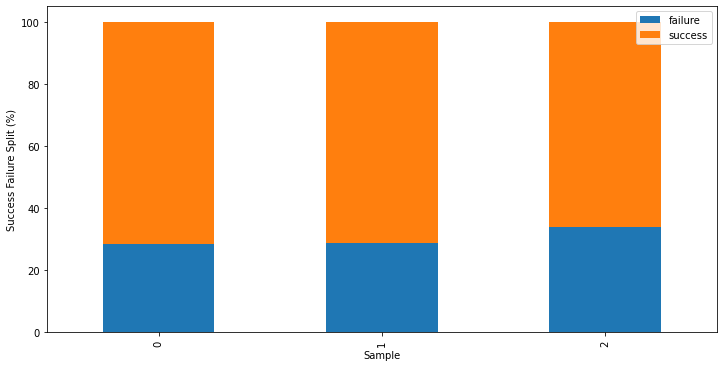

In [69]:
fig = failures_df[['failure', 'success']].plot.bar(stacked=True, figsize=(12,6))
fig.set(xlabel='Sample', ylabel='Success Failure Split (%)') 
fig.figure.savefig('screenshots/sample_success_failure.png') 